In [34]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt  

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/econometrica/refs/heads/main/econometrica-1/datasets/wage1.csv')
data.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [37]:
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [38]:
df[ pd.isnull(data['exper'])].head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq


In [39]:
df['exper'].unique() 

array([ 2, 22, 44,  7,  9, 15,  5, 26,  8,  3, 18, 31, 14, 10, 16, 13, 36,
       11, 29, 37, 30, 23, 39, 20, 45,  1, 40, 42, 25, 17, 24, 28, 19,  4,
        6, 34, 35, 46, 33, 48, 12, 47, 43, 41, 38, 49, 27, 21, 32, 50, 51],
      dtype=int64)

In [40]:
# обнуляем ячейки с отсутствием данных
# df = df[pd.isnull(df['lhrwage']) == -1 ]
# df = df[pd.isnull(data['hrwage']) == -1 ]
df = data.fillna(-1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
le.fit( data['educ'])

LabelEncoder()

In [46]:
X = df [['exper', 'wage','educ']]
X = pd.get_dummies (X, drop_first=True)
print()
X.head()

,exper,wage,educ
0,2,3.10,11
1,22,3.24,12
2,2,3.00,11
3,44,6.00,8
4,7,5.30,12


In [47]:
X

,exper,wage,educ
0,2,3.10,11
1,22,3.24,12
2,2,3.00,11
3,44,6.00,8
4,7,5.30,12
...,...,...,...
521,14,15.00,16
522,2,2.27,10
523,13,4.67,15
524,5,11.56,16


In [48]:
y = (data['married']>0).astype('int32')
y.head()

0    0
1    1
2    0
3    1
4    1
Name: married, dtype: int32

<Axes: >

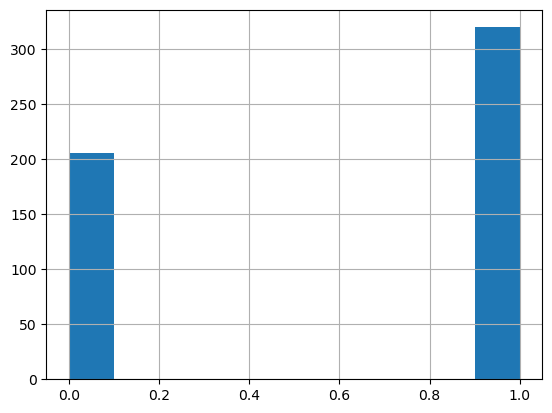

In [49]:
y.hist()

In [50]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [51]:
model = LogisticRegression()

In [52]:
y

0      0
1      1
2      0
3      1
4      1
      ..
521    1
522    0
523    1
524    1
525    0
Name: married, Length: 526, dtype: int32

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train

,exper,wage,educ
69,3,2.00,12
477,11,9.09,15
307,23,3.50,11
173,1,2.17,13
237,4,3.25,12
...,...,...,...
71,17,13.08,17
106,14,13.33,12
270,8,2.89,10
435,23,9.42,14


In [55]:
# обучаем на части датасета (train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [56]:
predictions[:10] # посмотрим как выглядят наши предсказания

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [57]:
model.predict(X_test) # получаем массив

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [58]:
model.predict_proba(X_test)

array([[0.19966918, 0.80033082],
       [0.10820602, 0.89179398],
       [0.20519971, 0.79480029],
       [0.42601234, 0.57398766],
       [0.28479201, 0.71520799],
       [0.23750944, 0.76249056],
       [0.55787482, 0.44212518],
       [0.39500396, 0.60499604],
       [0.55821144, 0.44178856],
       [0.31847855, 0.68152145],
       [0.41661705, 0.58338295],
       [0.30056568, 0.69943432],
       [0.16686496, 0.83313504],
       [0.11604648, 0.88395352],
       [0.59330938, 0.40669062],
       [0.16089432, 0.83910568],
       [0.65611206, 0.34388794],
       [0.24147497, 0.75852503],
       [0.37409989, 0.62590011],
       [0.36616787, 0.63383213],
       [0.19730012, 0.80269988],
       [0.35491819, 0.64508181],
       [0.39105602, 0.60894398],
       [0.37037129, 0.62962871],
       [0.25528522, 0.74471478],
       [0.66066913, 0.33933087],
       [0.20464906, 0.79535094],
       [0.60877959, 0.39122041],
       [0.38637578, 0.61362422],
       [0.24599802, 0.75400198],
       [0.

In [59]:
model.score(X_train, y_train) 

0.7214285714285714

In [60]:
from sklearn.metrics import f1_score

In [61]:
f1_score(y_test, model.predict(X_test))

0.8235294117647058

In [62]:
f1_score(y_train, model.predict(X_train))

0.7884267631103075

In [63]:
model.score(X_test,y_test)

0.7735849056603774